__Importing libraries for the evaluation -__

In [1]:
import pandas as pd #for datasets 
import numpy as np #for mathematical operation on arrays and matrices
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt #for exploratory data analysis
import matplotlib.gridspec as gridspec #used to specify the geometry of the grid to place a subplot
import mpld3 as mpl #create interactive visualizations from Matplotlib plots
import warnings
warnings.filterwarnings("ignore")

---

__Importing the dataset -__

In [2]:
#importing the data with a variable name - "dataset"
dataset = pd.read_csv('/Users/--/Documents/RHUL 22-23/Project/Datasets/Heart Faliure Prediction/heart-failure.csv')

---

__Data preprocessing -__

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [7]:
#Changing the Sex column into categorical values
dataset['Sex'] = dataset['Sex'].map({'M':0,'F':1})

In [8]:
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
#Changing the ChestPainType column into categorical values
dataset['ChestPainType'] = dataset['ChestPainType'].map({'ATA':0,'NAP':1, 'ASY':2, 'TA':3})  

In [10]:
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [11]:
#Changing the RestingECG column into categorical values
dataset['RestingECG'] = dataset['RestingECG'].map({'Normal':0,'ST':1, 'LVH':2})  

In [12]:
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
#Changing the ExerciseAngina column into categorical values
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].map({'N':0,'Y':1})  

In [14]:
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [15]:
#Changing the ST_Slope column into categorical values
dataset['ST_Slope'] = dataset['ST_Slope'].map({'Up':0,'Flat':1, 'Down':2})

In [16]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [17]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


---

__Data preparation for Test and Train split -__

In [19]:
x = dataset.drop("HeartDisease", axis='columns')
y = dataset.HeartDisease

In [20]:
x.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

---

__Train and Test -__

In [21]:
from sklearn.model_selection import train_test_split

x_train_one, x_test_one, y_train, y_test = train_test_split(x, y, random_state = 10, shuffle=True)

---

__Feature selection -__

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
no_of_features_to_choose = 4
best_selected = SelectKBest(score_func = f_classif, k = no_of_features_to_choose)
x_train = best_selected.fit_transform(x_train_one, y_train)
x_test = best_selected.transform(x_test_one)

---

__Libraries imported for Bagging and Boosting (Ensemble Methods) -__

In [23]:
from sklearn.ensemble import BaggingClassifier #Bagging
from sklearn.ensemble import RandomForestClassifier #Bagging
from sklearn.tree import DecisionTreeClassifier #Bagging
from sklearn.linear_model import LogisticRegression #Bagging
from sklearn.ensemble import AdaBoostClassifier #Boosting (Decision tree will be used as base estimator)
from sklearn.ensemble import GradientBoostingClassifier #Boosting
import xgboost as xgb #Boosting
from sklearn.metrics import accuracy_score #Accuracy
from sklearn.model_selection import cross_val_score #Cross-Validation

---

__Random Forest with OOB and cross-validation score (Bagging) -__

In [24]:
# Define the random forest classifier
randfo_model = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)
 
# Train the random forest model model
randfo_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = randfo_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(randfo_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_randfo = accuracy_score(y_test, y_prediction)

#Taking the OOB score
oob_score = randfo_model.oob_score_

#print accuracy, cross-validation and OOB score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_randfo))
print("OOB Score : %s" % "{0:.3%}".format(oob_score))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 76.087%
OOB Score : 77.035%
Cross-Validation Scores :
84.783%
84.239%
81.522%
80.328%
73.224%


__Decision Tree (Bagging) -__

In [25]:
# Define the bagging classifier using the Decision tree model as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_dtrees = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_dtrees))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 74.348%
Cross-Validation Scores :
82.065%
81.522%
82.609%
79.781%
68.852%


In [26]:
# Define the bagging classifier using the Decision tree model as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 76.522%
Cross-Validation Scores :
84.783%
80.978%
82.609%
78.689%
73.224%


__Logistic Regression (Bagging) -__

Normal Logistic Regression -

In [27]:
# Creating a logistic regression model
logisticreg_model = LogisticRegression()

# Training the logistic regression model
logisticreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_prediction = logisticreg_model.predict(x_test)

# Cross Validation score
scores = cross_val_score(logisticreg_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = logisticreg_model.score(x_test, y_prediction)

# Print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 100.000%
Cross-Validation Scores :
80.978%
79.891%
81.522%
82.514%
74.863%


Logistic Regression using Bagging Classifier -

In [28]:
# Define the bagging classifier using the Logistic Regression model as the base estimator
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_logreg = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_logreg))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.978%
78.804%
80.978%
82.514%
74.317%


In [29]:
# Define the bagging classifier using the Logistic Regression model as the base estimator
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
 
# Train the bagging model
bagging_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = bagging_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(bagging_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.978%
79.891%
81.522%
82.514%
74.863%


__AdaBoost using Decision Tree as a base estimator (Boosting) -__

In [30]:
# Define AdaBoost using the Decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_adaBdtree = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_adaBdtree))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 76.522%
Cross-Validation Scores :
77.174%
73.370%
78.261%
78.142%
66.667%


In [31]:
# Define AdaBoost using the Decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 76.957%
Cross-Validation Scores :
77.174%
73.370%
78.261%
78.142%
66.667%


__AdaBoost using Logistic regression as a base estimator (Boosting) -__

In [32]:
# Define AdaBoost using the Logistic regression model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_adaBlogreg = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_adaBlogreg))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 77.826%
Cross-Validation Scores :
78.261%
82.065%
78.804%
80.874%
74.863%


In [33]:
# Define AdaBoost using the Logistic regression model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
 
# Train the boosting model
adaboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = adaboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(adaboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
80.435%
78.804%
80.978%
80.328%
73.770%


__Gradient Boosting (Boosting) -__

In [34]:
# Define Gradient Boosting
gradientboost_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Train the boosting model
gradientboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = gradientboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(gradientboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_gradB = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_gradB))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 83.913%
Cross-Validation Scores :
91.304%
84.783%
79.891%
79.781%
72.131%


In [35]:
# Define Gradient Boosting
gradientboost_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train the boosting model
gradientboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = gradientboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(gradientboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 82.609%
Cross-Validation Scores :
87.500%
85.870%
81.522%
80.874%
74.863%


__XGBoost (Boosting) -__

In [36]:
# Define XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Train the boosting model
xgboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = xgboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(xgboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy_xgB = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy_xgB))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 81.304%
Cross-Validation Scores :
91.848%
82.609%
80.435%
75.956%
72.678%


In [37]:
# Define XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train the boosting model
xgboost_model.fit(x_train, y_train)
 
# Make predictions on the test set
y_prediction = xgboost_model.predict(x_test)

# Cross Validaion Score
scores = cross_val_score(xgboost_model, x, y, cv=5)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

#print accuracy and cross-validation score
print("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("Cross-Validation Scores :")
for cv_score in scores:
    print("{:.3%}".format(cv_score))

Accuracy : 78.696%
Cross-Validation Scores :
88.043%
85.870%
83.152%
80.328%
74.317%


__Comparison of all the algorithms with their accuracy's -__

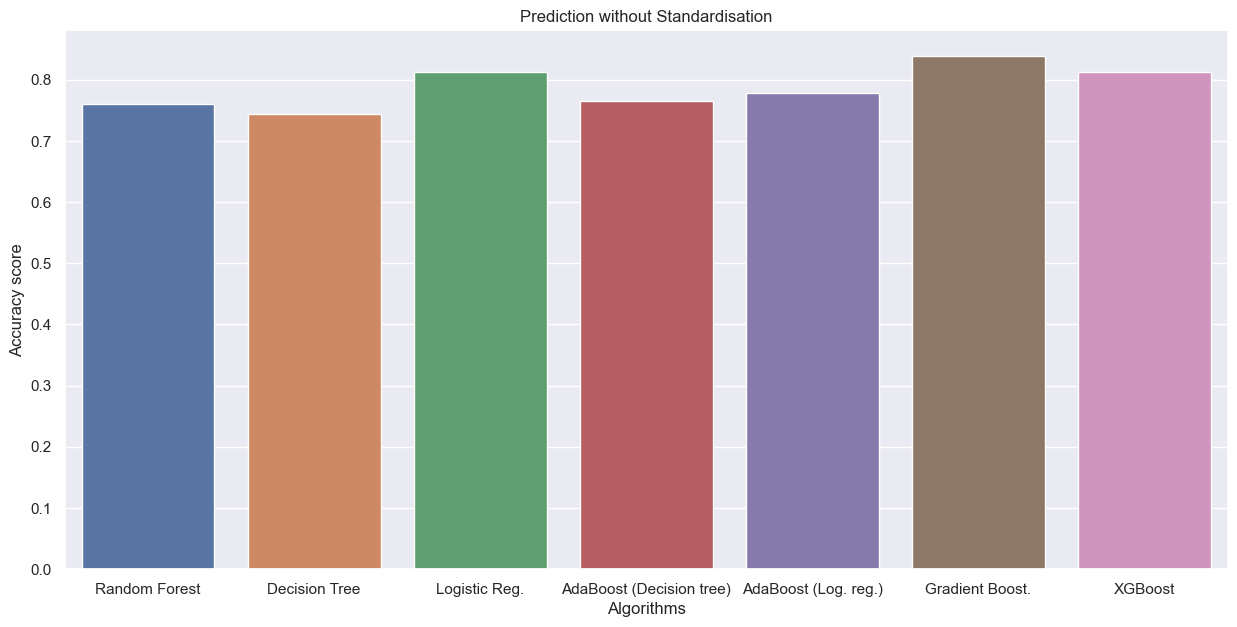

In [38]:
algos = ['Random Forest', 'Decision Tree','Logistic Reg.', 'AdaBoost (Decision tree)', 'AdaBoost (Log. reg.)', 'Gradient Boost.', 'XGBoost']
accuracies = [accuracy_randfo, accuracy_dtrees ,accuracy_logreg, accuracy_adaBdtree, accuracy_adaBlogreg, accuracy_gradB, accuracy_xgB]

sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Prediction without Standardisation")

sns.barplot(x = algos, y = accuracies)
plt.show()